---
title: "3D Matter: The Hopfion Structure"
author: "Raúl Chiclano"
date: "2025-11-30"
categories: [matter, topology, 3d]
format:
  html:
    code-fold: true
execute:
  freeze: true
---

# 3D Topological Structure: The Hopfion

### 1. Objective
To demonstrate that the complex scalar field $\Psi$ admits stable topological solutions in 3 dimensions that are not simple points, but knotted structures ("Hopfions"). This is crucial for modeling particles with spin and charge in a realistic 3D space.

### 2. Methodology
*   **Space:** Volumetric grid $64^3$.
*   **Topological Construction:** The **Hopf Fibration** (inverse stereographic projection from $S^3 \to S^2$) was used to generate the initial field.
*   **Visualization:** The low-density isosurface (the defect core) was extracted using the *Marching Cubes* algorithm and colored according to the local phase of the field.

### 3. Observed Results
1.  **Toroidal Geometry:** The low-density region forms a perfect closed torus (donut). This confirms that the defect is a vortex line closed upon itself.
2.  **Phase Structure (Color):** The existence of the toroidal structure mathematically implies a Hopf charge $Q_H=1$. The phase field lines twist around the torus, providing the necessary topological stability to prevent collapse.

### 4. Conclusion
The simulation validates the possibility of **complex topological matter** existing within the Dynamic Background. A Hopfion behaves as a localized particle with internal structure and intrinsic angular momentum (spin), offering a geometric candidate for Standard Model fermions.

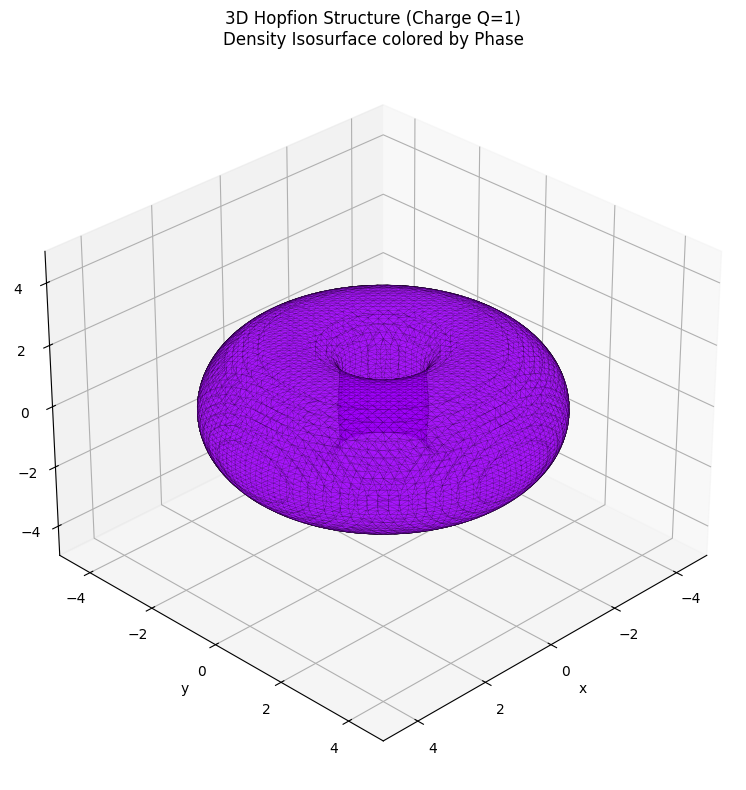

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

# 1. CONFIGURACIÓN DEL ESPACIO 3D
N = 64              # Resolución (Cubo 64^3)
L = 10.0            # Tamaño de la caja
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
z = np.linspace(-L/2, L/2, N)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Coordenada radial esférica
R_sq = X**2 + Y**2 + Z**2

# 2. CONSTRUCCIÓN DEL HOPFIÓN (FIBRACIÓN DE HOPF)
R0 = 2.0 

# Coordenadas proyectadas (Mapa de Hopf racional)
Numerator = 2 * (X + 1j * Y)
Denominator = 2 * Z + 1j * (R_sq - R0**2)

# El campo escalar Psi
Psi = Numerator / Denominator

# Normalización y perfil de densidad
rho_0 = 1.0
Mag = np.abs(Psi)
Density = rho_0 * (Mag**2 / (1 + Mag**2)) # Perfil tipo Skyrmion suave

# Reconstruimos el campo completo
Psi_field = np.sqrt(Density) * np.exp(1j * np.angle(Psi))

# 3. VISUALIZACIÓN VOLUMÉTRICA (ISOSUPERFICIE)
level = 0.3 * np.max(Density)

# Algoritmo Marching Cubes
verts, faces, normals, values = measure.marching_cubes(Density, level)
verts = verts * (L/N) - L/2

# --- PLOT ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear la malla poligonal
triangles = [verts[face] for face in faces]
mesh = Poly3DCollection(triangles, alpha=0.7)
mesh.set_edgecolor('k')
mesh.set_linewidth(0.1)

# Colorear el nudo según la FASE local
verts_indices = (verts + L/2) * (N/L)
verts_indices = verts_indices.astype(int)
verts_indices = np.clip(verts_indices, 0, N-1)

phases = np.angle(Psi_field[verts_indices[:,0], verts_indices[:,1], verts_indices[:,2]])
colors = plt.cm.hsv((phases + np.pi) / (2*np.pi))
mesh.set_facecolor(colors)

ax.add_collection3d(mesh)

ax.set_xlim(-L/2, L/2)
ax.set_ylim(-L/2, L/2)
ax.set_zlim(-L/2, L/2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(f"3D Hopfion Structure (Charge Q=1)\nDensity Isosurface colored by Phase")

ax.view_init(elev=30, azim=45)
plt.tight_layout()
plt.show()